In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')


In [4]:
house_dt = pd.read_csv("/Users/Z00BGQF/Documents/ML/House_Price_Prediction/train.csv")

### Reading and Understanding Data

In [5]:
pd.set_option('display.max_columns', None)
house_dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_dt.shape

(1460, 81)

In [7]:
house_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning and Preparation

In [8]:
#Converting OverallQual, OverallCond and MSSubClass are categorical column but in the original dataset teh types of these columns are numeric



house_dt['MSSubClass'] = house_dt['MSSubClass'].astype('object')
house_dt['OverallQual'] = house_dt['OverallQual'].astype('object')
house_dt['OverallQual'] = house_dt['OverallQual'].astype('object')

In [9]:
!pip install sweetviz

  Using cached sweetviz-2.1.4-py3-none-any.whl (15.1 MB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)


In [20]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [23]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import sweetviz as sv
sweet_report = sv.analyze(house_dt,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data Cleaning and Preparation

#### Handling Missing Values

In [11]:
# Checking % of missing values in columns

(round(100*(house_dt.isnull().sum()/len(house_dt.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False).head(20)

,Nulls
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


There are some NA values which have some meaning as per data dictionary. This should be converted as per dictionary



In [12]:
house_dt['Alley'] = house_dt['Alley'].replace(np.nan,'No ally access')
house_dt['BsmtQual'] = house_dt['BsmtQual'].replace(np.nan, 'No Basement')
house_dt['BsmtCond'] = house_dt['BsmtCond'].replace(np.nan, 'No Basement')
house_dt['BsmtExposure'] = house_dt['BsmtExposure'].replace(np.nan, 'No Basement')
house_dt['BsmtFinType1'] = house_dt['BsmtFinType1'].replace(np.nan, 'No Basement')
house_dt['BsmtFinType2'] = house_dt['BsmtFinType2'].replace(np.nan, 'No Basement')
house_dt['FireplaceQu'] = house_dt['FireplaceQu'].replace(np.nan, 'No Fireplace')
house_dt['GarageType'] = house_dt['GarageType'].replace(np.nan, 'No Garage')
house_dt['GarageFinish'] = house_dt['GarageFinish'].replace(np.nan, 'No Garage')
house_dt['GarageQual'] = house_dt['GarageQual'].replace(np.nan, 'No Garage')
house_dt['GarageCond'] = house_dt['GarageCond'].replace(np.nan, 'No Garage')
house_dt['PoolQC'] = house_dt['PoolQC'].replace(np.nan, 'No Pool')
house_dt['Fence'] = house_dt['Fence'].replace(np.nan, 'No Fence')
house_dt['MiscFeature'] = house_dt['MiscFeature'].replace(np.nan, 'None')

In [13]:
# As LotFrontage column has 17.74% missing values, Let's see teh distribution of the value of the LotFrontage column

house_dt['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [14]:
house_dt.loc[np.isnan(house_dt['LotFrontage']),'LotFrontage'] = house_dt['LotFrontage'].median()

In [15]:
# For column 'MasVnrType', Imputing it with mode 'None'
house_dt['MasVnrType'] = house_dt['MasVnrType'].fillna('None')

In [16]:
# For column 'MasVnrArea', Imputing it with mode 0 corresponding to None
house_dt['MasVnrArea'] = house_dt['MasVnrArea'].fillna(0)

In [17]:
# Imputing Electrical column missing values with Sbrkr as Mode

house_dt.loc[pd.isnull(house_dt['Electrical']),['Electrical']] = 'SBrkr'

In [18]:
# For Column 'GarageYrBlt' , Nan stands for house with no garage or the Garage was not build itself
#, let's impute with 0
house_dt['GarageYrBlt'] = house_dt['GarageYrBlt'].fillna(0)

In [19]:
#Lets again check with percentage of missing values in columns
(round(100*(house_dt.isnull().sum()/len(house_dt.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False).head(20)

,Nulls
Id,0.0
CentralAir,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0


#### Outliers Treatment

In [20]:
# Numeric columns list
numeric_cols = list(house_dt.select_dtypes(include=['int64','float64']).columns)

In [21]:
numeric_cols.remove('Id')
print(numeric_cols)

['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [22]:
house_dt.select_dtypes(include=['int64','float64']).describe()

,Id,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,22.027677,9981.264932,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
def remove_outliers(dt,num1_list):
    for i in num1_list:
        Q1 = dt[i].quantile(0.05)
        Q3 = dt[i].quantile(0.95)
        IQR = Q3 - Q1
        dt = dt[(dt[i] >= Q1-2.5*IQR) & (dt[i] <= Q3+2.5*IQR)]
    return dt

In [24]:
house_dt = remove_outliers(house_dt,numeric_cols)

In [25]:
house_dt.select_dtypes(include=['int64','float64']).describe()

,Id,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.0,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.0,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.0,1227.000000,1227.0,1227.0,1227.000000,1227.000000,1227.000000
mean,734.595762,69.727791,9951.653627,5.569682,1974.768541,1986.407498,110.028525,454.889976,48.777506,576.610432,1080.277914,1165.277099,347.557457,0.0,1512.834556,0.431133,0.055420,1.566422,0.409128,2.828036,1.0,6.458843,0.641402,1979.365933,1.869601,499.060310,99.005705,47.430318,20.208639,0.0,15.954360,0.0,0.0,6.312143,2007.805216,187129.196414
std,420.668441,19.869293,4750.706061,1.060484,28.739567,20.293006,182.460365,436.835852,164.402786,444.655680,403.165798,374.812464,433.766085,0.0,494.774640,0.503601,0.232427,0.544389,0.500096,0.733000,0.0,1.503306,0.631046,24.648205,0.638064,186.565803,125.058482,63.249324,58.380332,0.0,55.261129,0.0,0.0,2.685143,1.327476,77993.955137
min,1.000000,21.000000,1300.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.0,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,3.000000,0.000000,1906.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000,35311.000000
25%,371.500000,60.000000,7667.500000,5.000000,1957.000000,1969.000000,0.000000,0.000000,0.000000,238.500000,816.000000,887.500000,0.000000,0.0,1143.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1962.000000,1.000000,362.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,2007.000000,135000.000000
50%,731.000000,69.000000,9531.000000,5.000000,1977.000000,1996.000000,0.000000,403.000000,0.000000,476.000000,1013.000000,1094.000000,0.000000,0.0,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1982.000000,2.000000,484.000000,26.000000,29.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2008.000000,170000.000000
75%,1101.500000,79.000000,11645.000000,6.000000,2003.000000,2004.000000,174.500000,735.000000,0.000000,813.500000,1312.500000,1391.500000,728.500000,0.0,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2003.000000,2.000000,588.000000,174.000000,70.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,2009.000000,221000.000000
max,1460.000000,182.000000,50271.000000,9.000000,2010.000000,2010.000000,1378.000000,2260.000000,1127.000000,2336.000000,3206.000000,3228.000000,1872.000000,0.0,4676.000000,2.000000,2.000000,3.000000,2.000000,5.000000,1.0,12.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,502.000000,386.000000,0.0,396.000000,0.0,0.0,12.000000,2010.000000,755000.000000


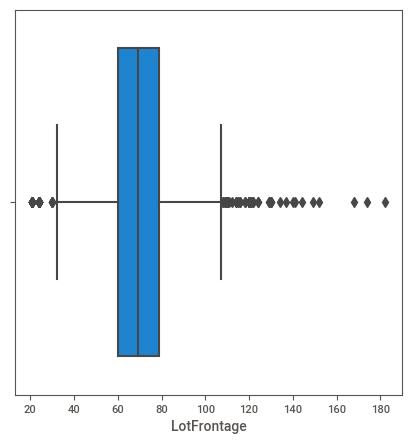

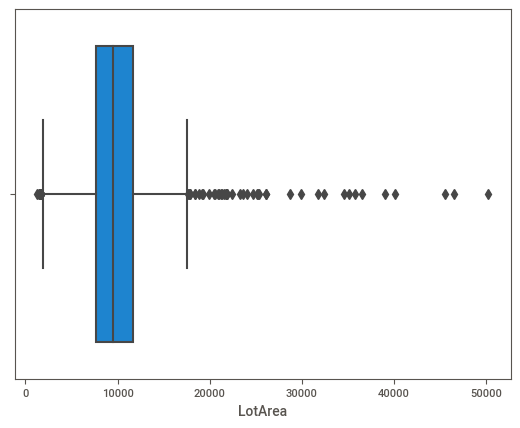

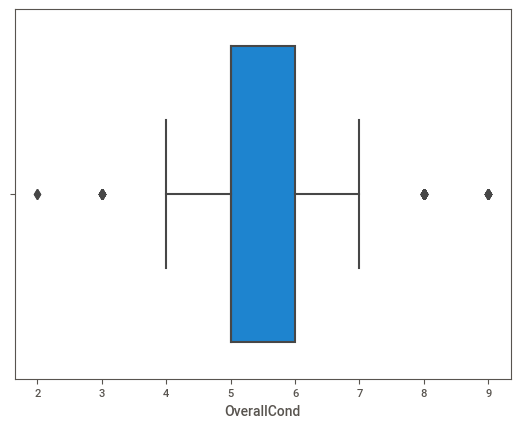

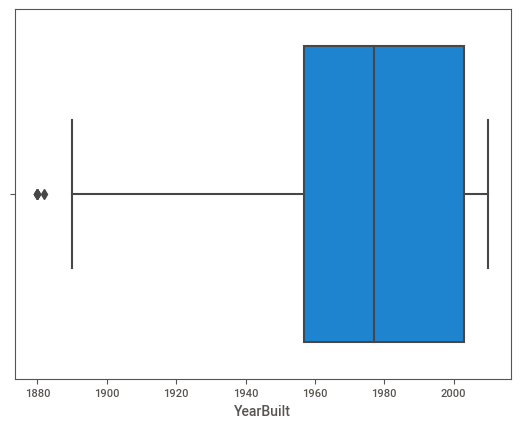

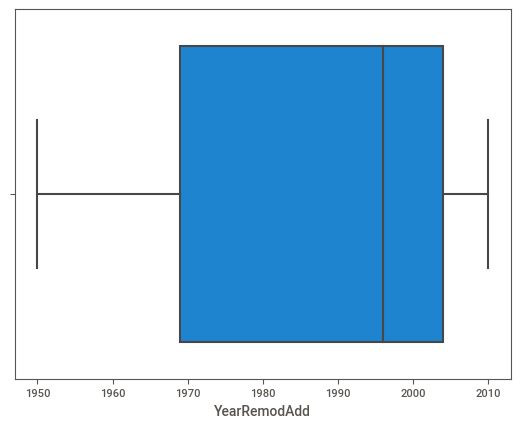

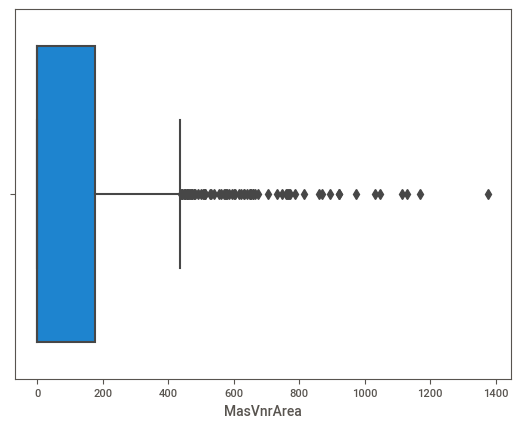

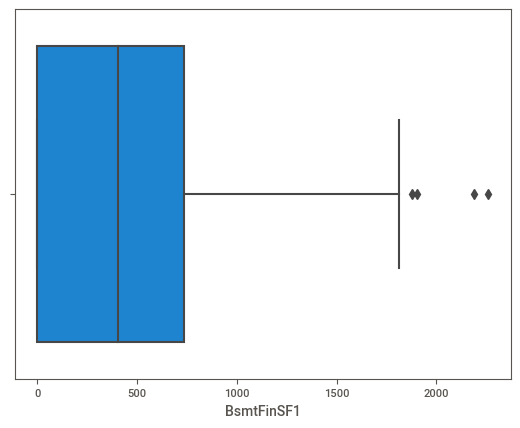

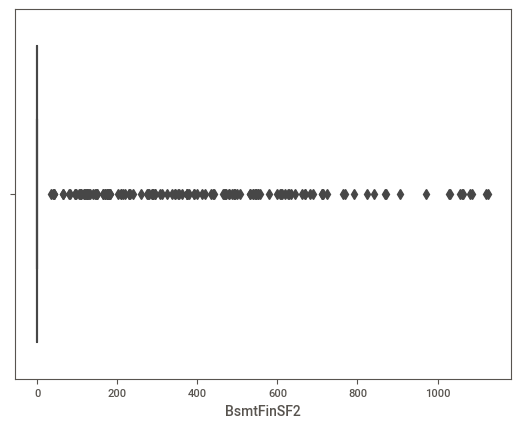

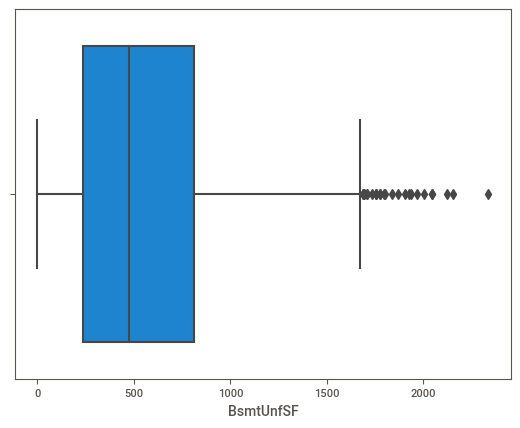

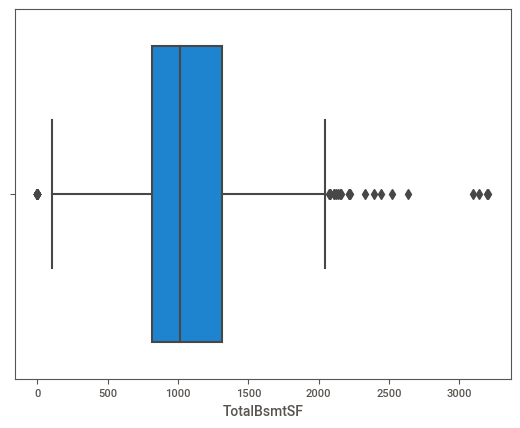

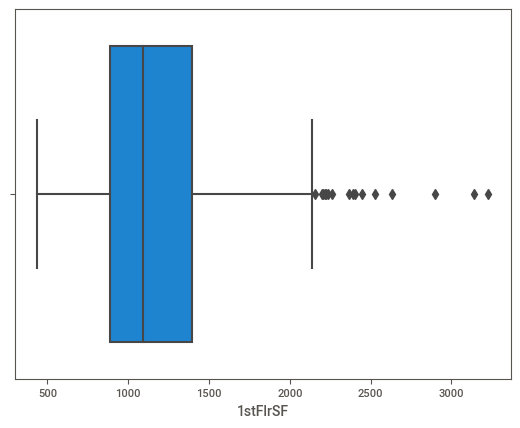

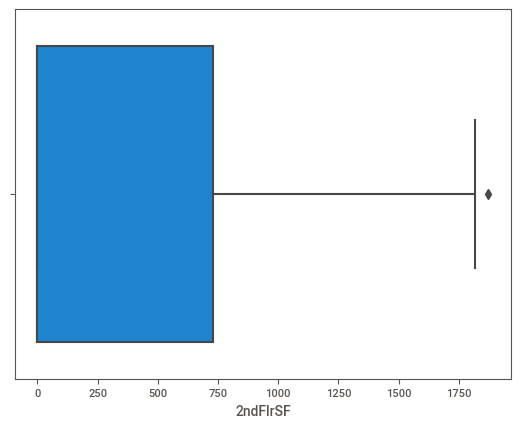

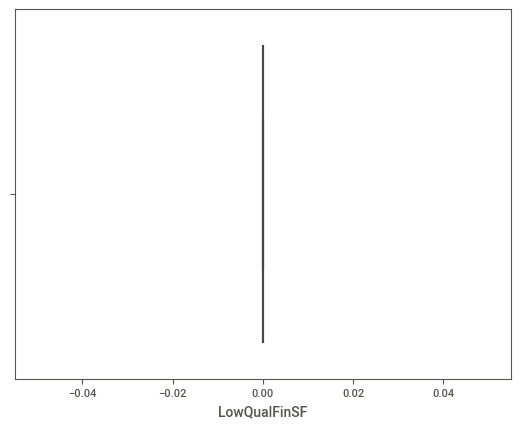

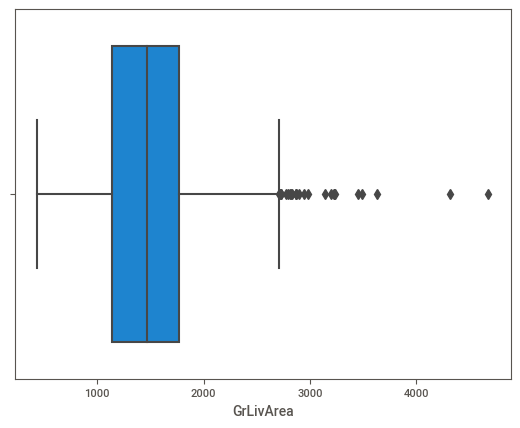

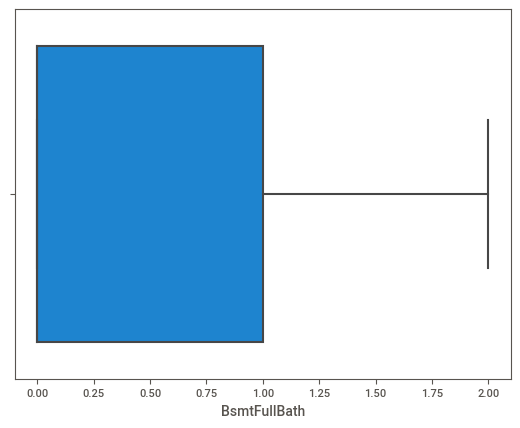

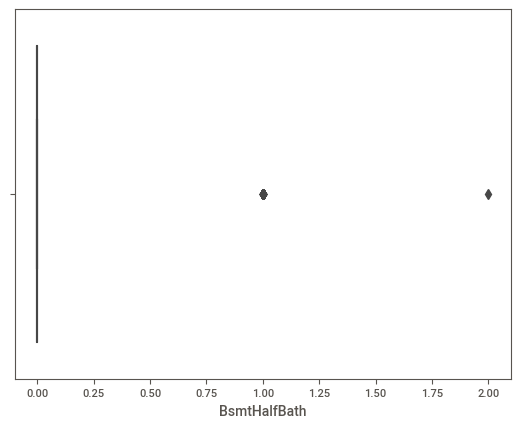

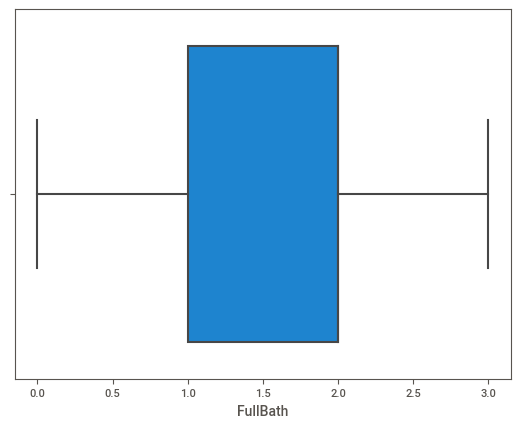

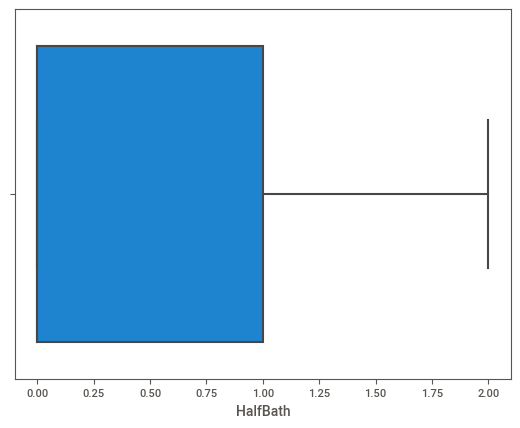

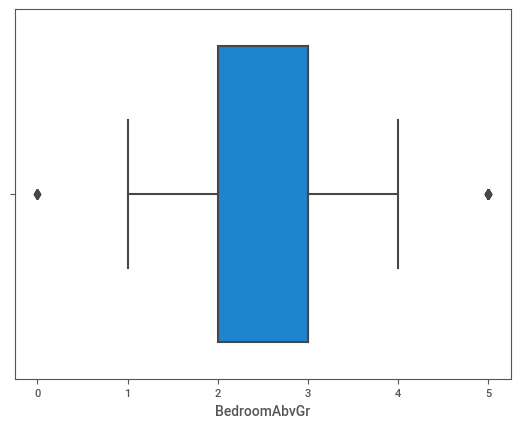

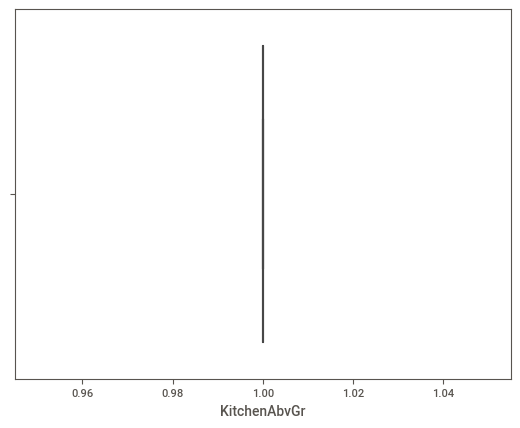

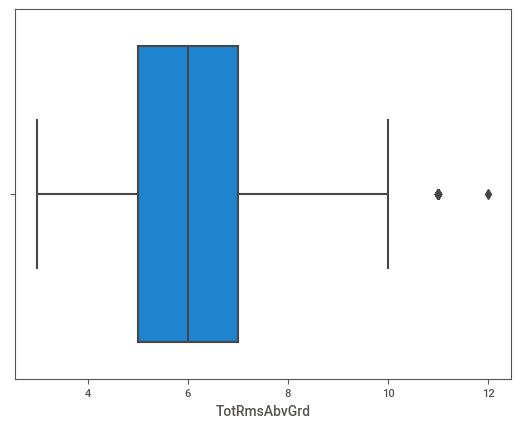

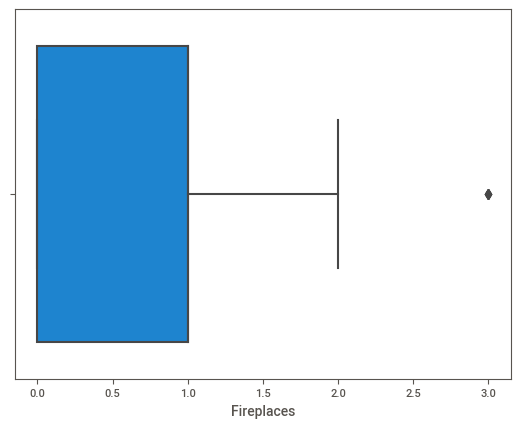

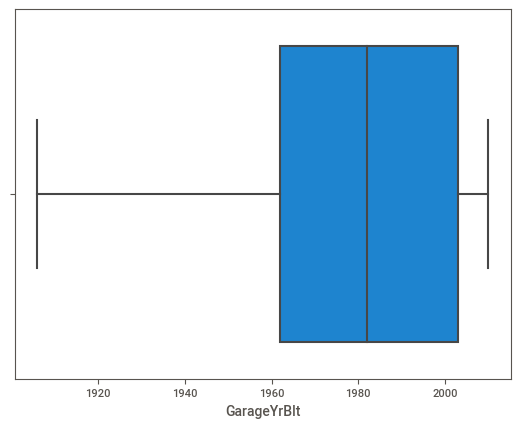

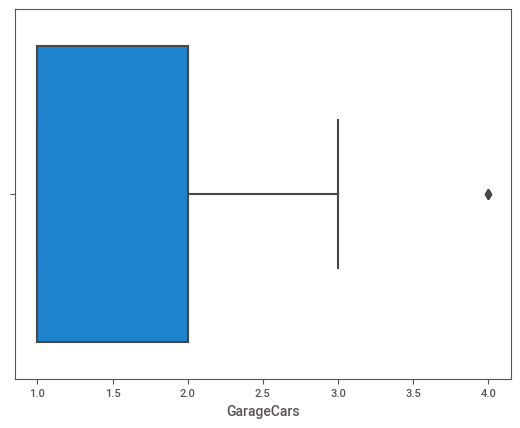

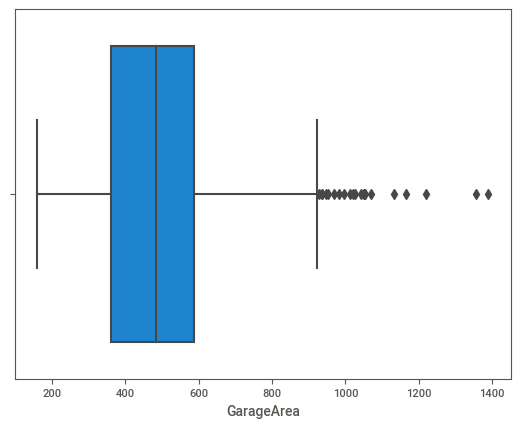

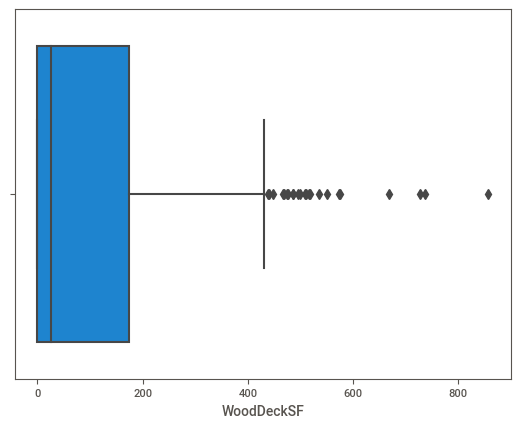

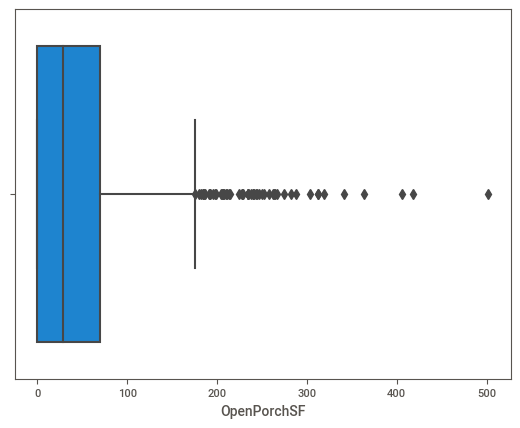

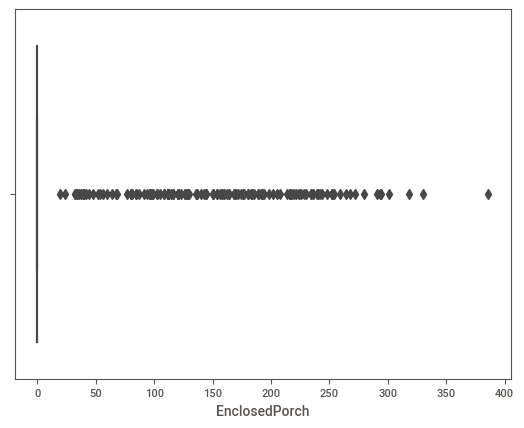

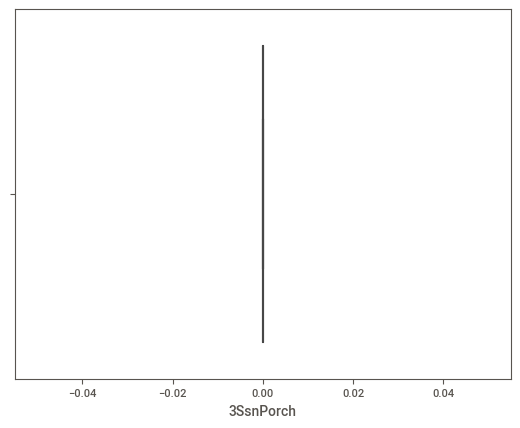

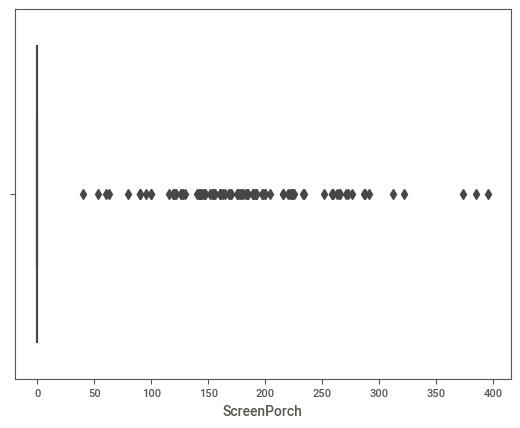

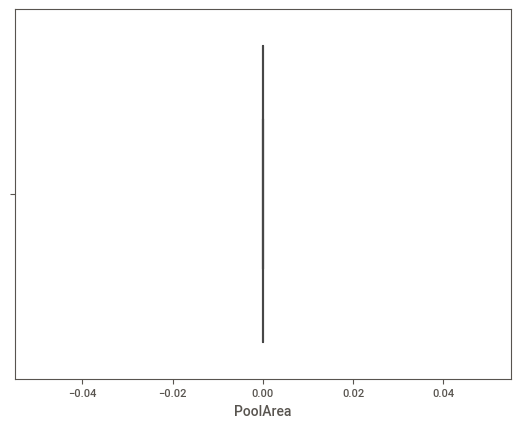

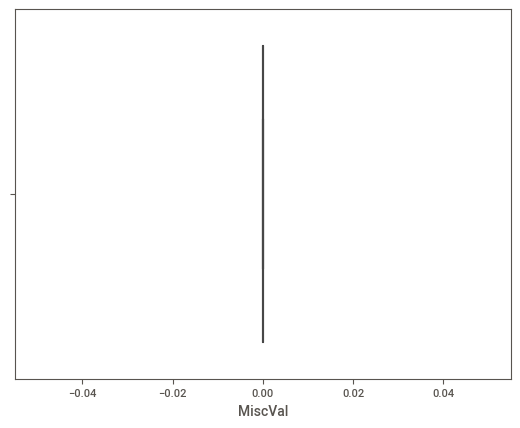

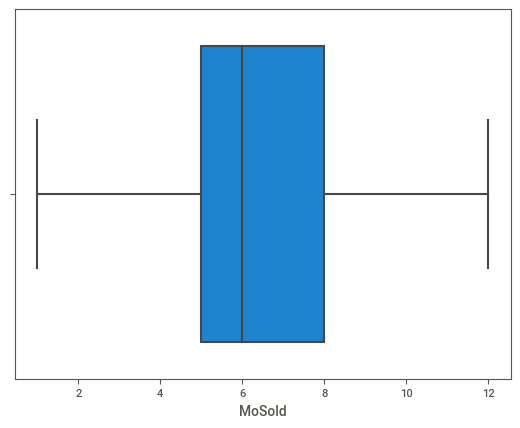

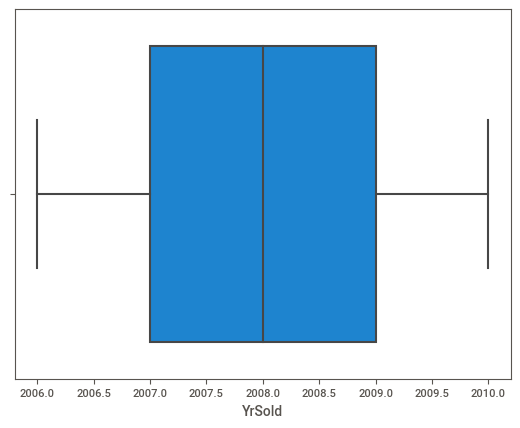

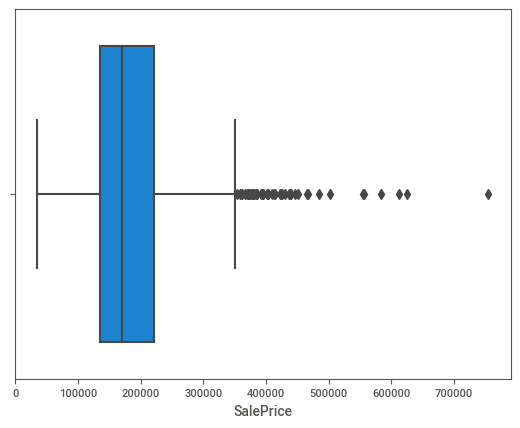

In [26]:
#Plotting the spread of the numeric columns
plt.figure(figsize=(5,5))
for i in numeric_cols:
    sns.boxplot(x=i,data=house_dt)
    plt.show()

### Creating a derived columns

In [27]:
#Age of the house
house_dt['AgeHouse'] = house_dt['YrSold'] - house_dt['YearBuilt']

Removing few columns:

YrSold and YearBuilt columns, As we derived the age of the house, so we do not need these columns anymore in our analysis. YearRemodAdd, GarageYrBlt and moSold Columns - As these columns will not be such useful while doing our analysis.

In [28]:
# Removing columns
house_dt.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis=1,inplace = True)

In [29]:
#List of Categorical columns
category_cols = house_dt.select_dtypes(include='object').columns
category_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

Droppingfew columns having less values, due to less values they will give less variance

In [30]:
house_dt.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','BldgType','RoofMatl','BsmtCond','Heating',
         'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType','ExterCond','BsmtFinType2'],
       axis=1, inplace=True)

In [31]:
house_dt.shape

(1227, 56)

In [32]:
##Function to Plt Charts

def plot_charts(var,label_rotation):
    plt.figure(figsize=(12,10))
    plt.subplot(2,2,1)
    plt.title('COunt Plot Of '+var)
    plt1=sns.countplot(house_dt[var],palette=("husl"))
    plt1.set(xlabel = '%s'%var,ylabel='Count Of'+ '%s'%var)
    if(label_rotation):
        plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,2)
    plt.title(var+' vs Price')
    plt2= sns.boxplot(x=house_dt[var],y=house_dt.SalePrice,palette=("husl"))
    if(label_rotation):
        plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
        

    plt.show()

 Combining the lower number of value counts into a new value called "Other"
 
 Creating the dummy variables for the categorical variables with multiple levels.

In [33]:
house_dt = house_dt.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other', 'FV':'Other'},
                'LotShape': {'IR2':'Other', 'IR3':'Other'},
                'LotConfig': {'CulDSac':'Other', 'FR2':'Other', 'FR3':'Other'},
                'Neighborhood': {'Blueste':'Other', 'NPkVill':'Other', 'Veenker':'Other', 'BrDale':'Other', 'Blmngtn':'Other',
                                 'MeadowV':'Other', 'SWISU':'Other', 'StoneBr':'Other', 'ClearCr':'Other',
                                 'IDOTRR':'Other', 'Timber':'Other', 'NoRidge':'Other', 'Mitchel':'Other'},
                'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other',
                               'RRAn':'Other', 'Artery':'Other'},
                'HouseStyle': {'2.5Fin':'Other', '2.5Unf':'Other', '1.5Unf':'Other', 'SFoyer':'Other', 'SLvl':'Other'},
                'OverallQual': {1:'Other', 2:'Other', 10:'Other', 3:'Other', 9:'Other'},
                'OverallCond': {1:'Other', 2:'Other', 9:'Other', 3:'Other', 4:'Other'},
                'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'},
                'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other',
                              'AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'},
                'Exterior2nd': {'CBlock':'Other', 'AsphShn':'Other', 'Stone':'Other', 'Brk Cmn':'Other','ImStucc':'Other',
                              'AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'},
                'ExterQual': {'Fa':'Other', 'Ex':'Other'},
                'Foundation': {'Wood':'Other', 'Stone':'Other','Slab':'Other'},
                'BsmtQual': {'Fa':'Other', 'No Basement':'Other'},
                'HeatingQC': {'Fa':'Other', 'Po':'Other'},
                'KitchenQual': {'Fa':'Other', 'Ex':'Other'},
                'FireplaceQu': {'Fa':'Other', 'Ex':'Other','Po':'Other'},
                'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other'},
                'Fence': {'MnWw':'Other', 'GdWo':'Other','GdPrv':'Other'},
                'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other'},
                'MSSubClass': {40:'Other', 180:'Other',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',
                               80:'Other',70:'Other',160:'Other',30:'Other'}})

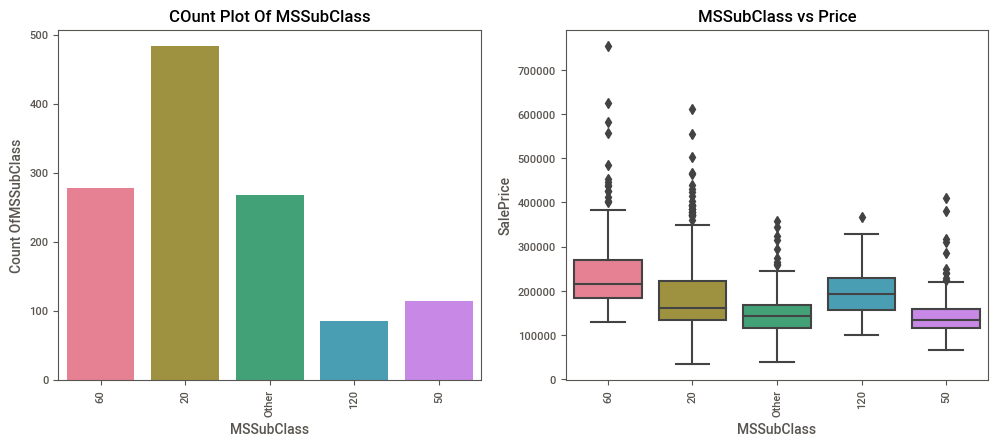

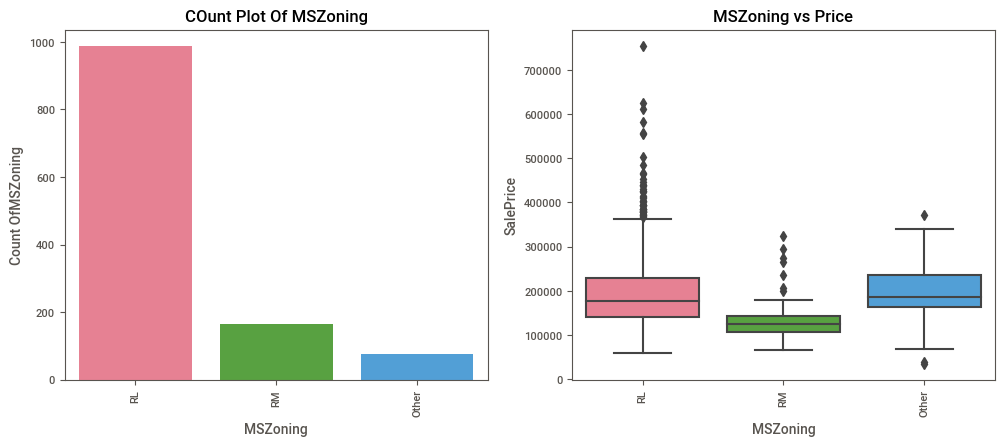

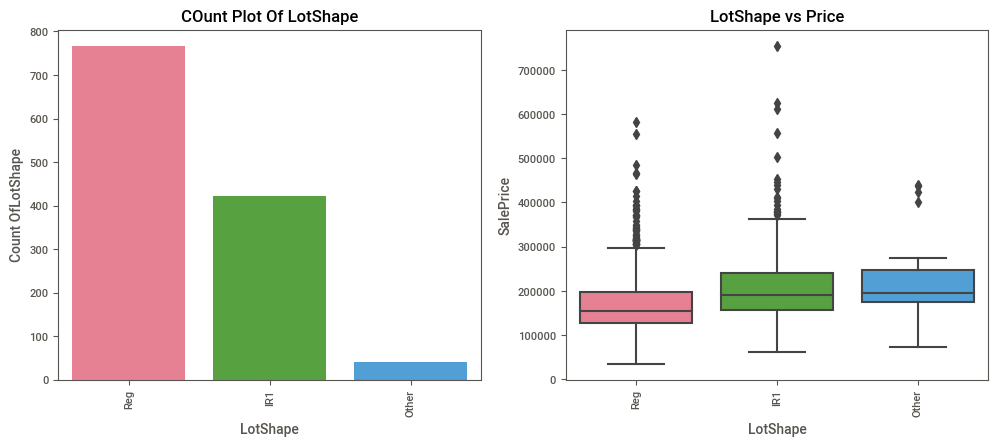

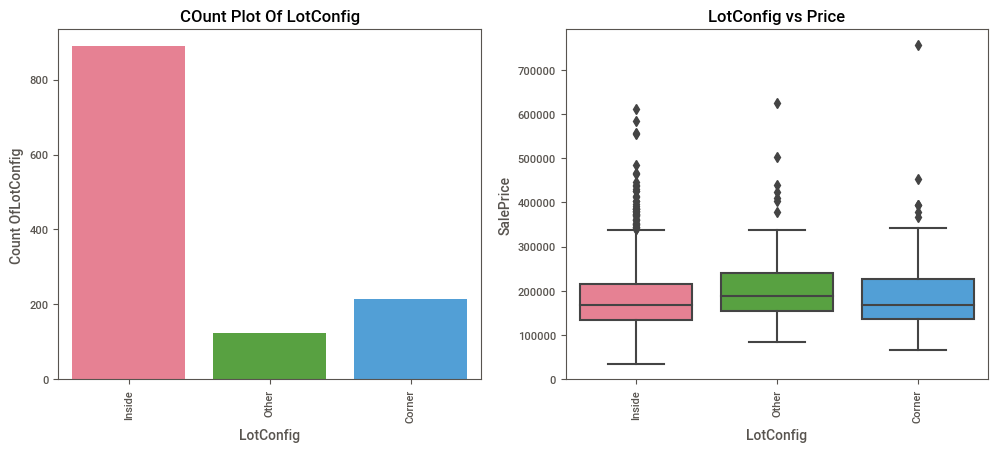

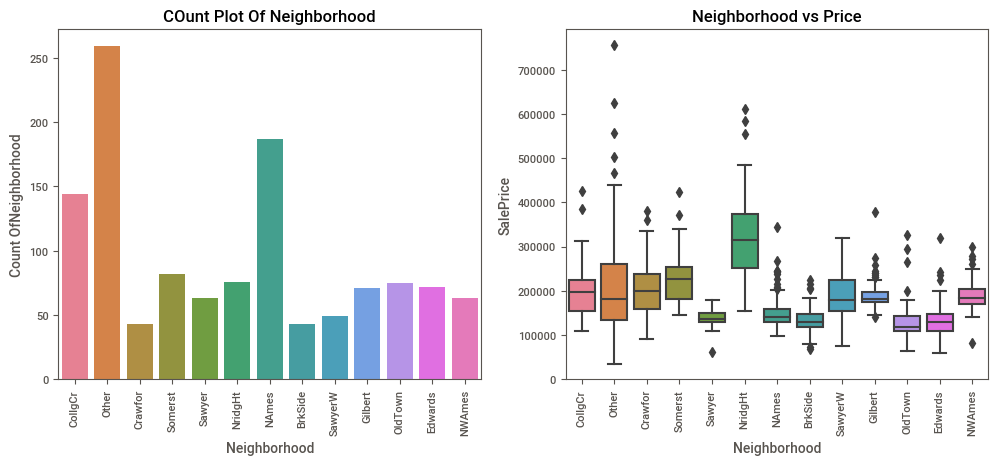

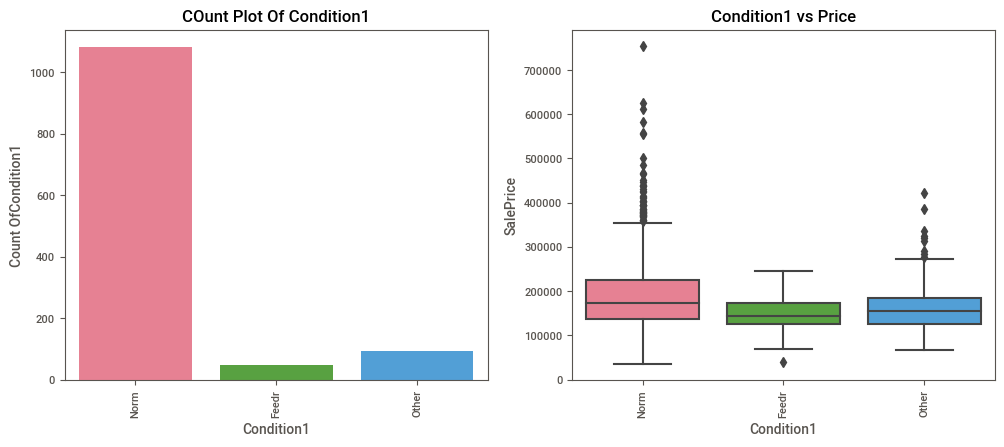

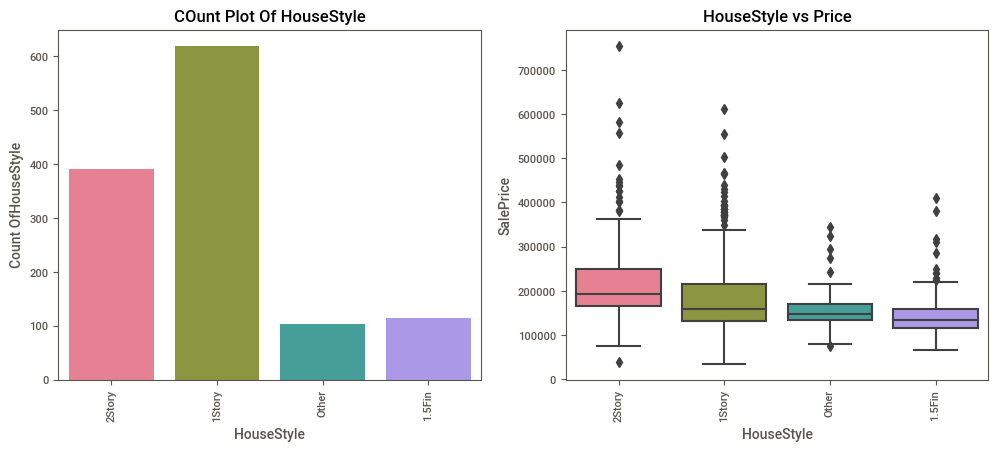

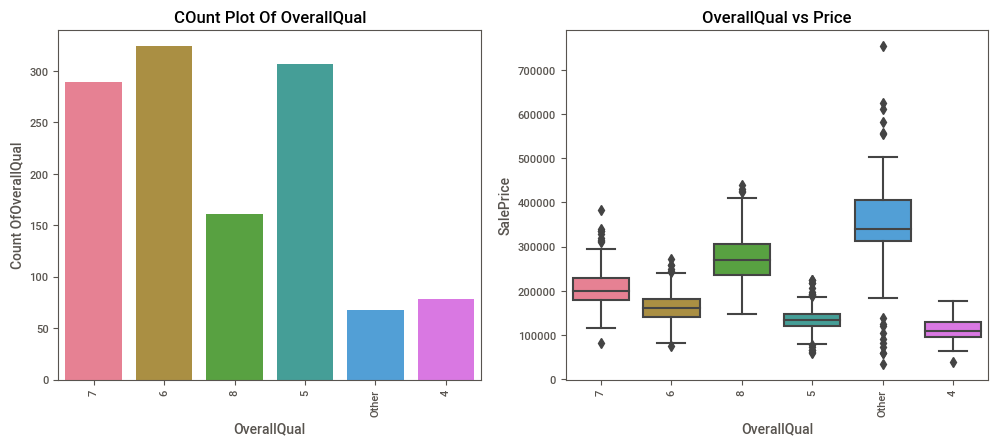

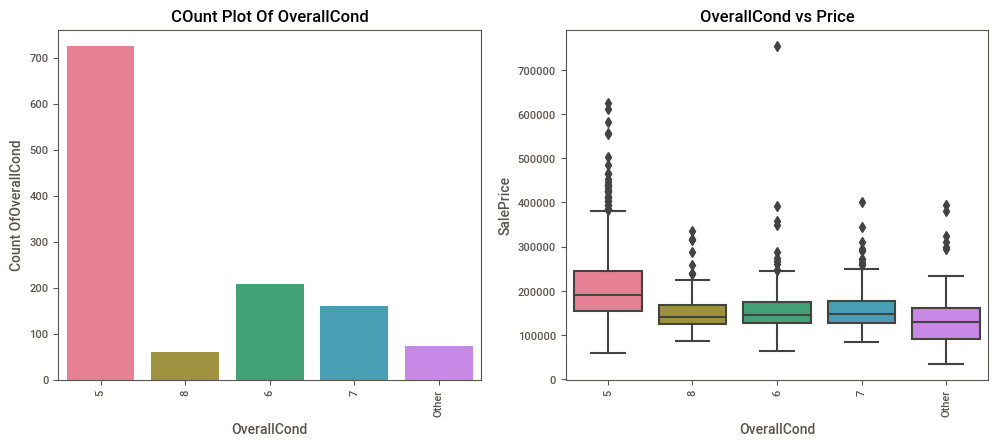

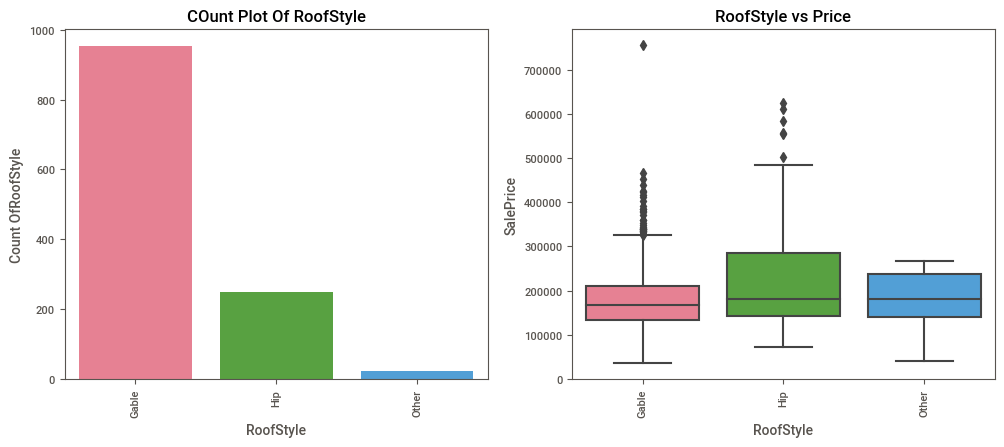

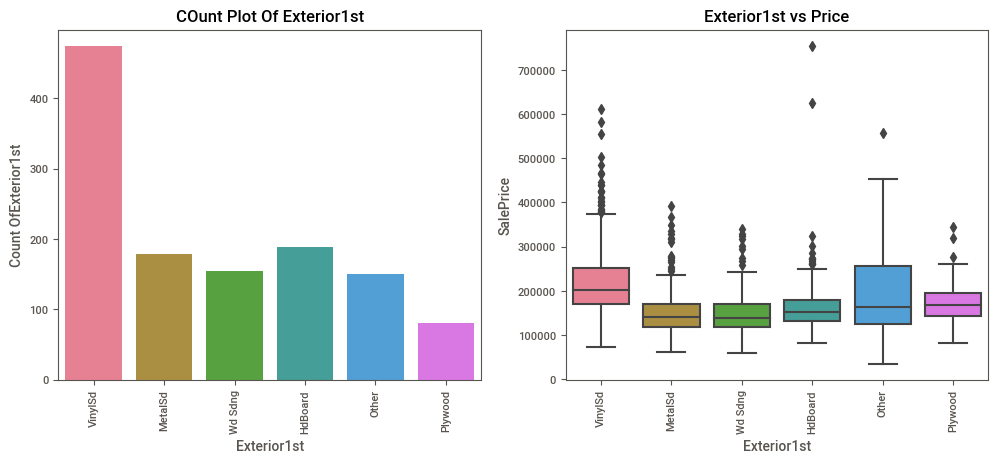

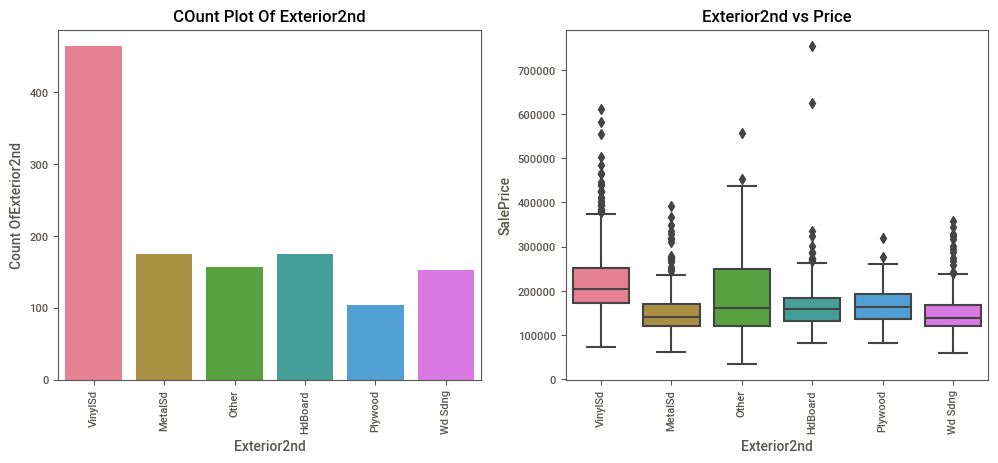

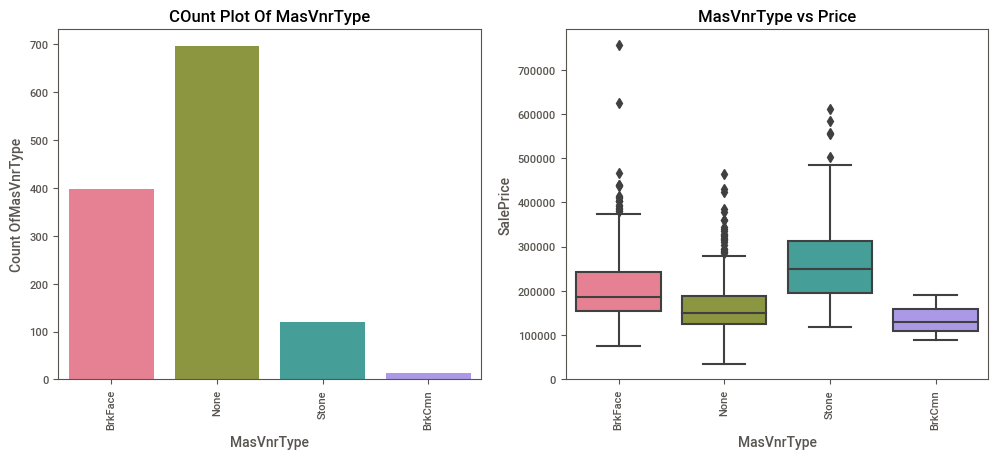

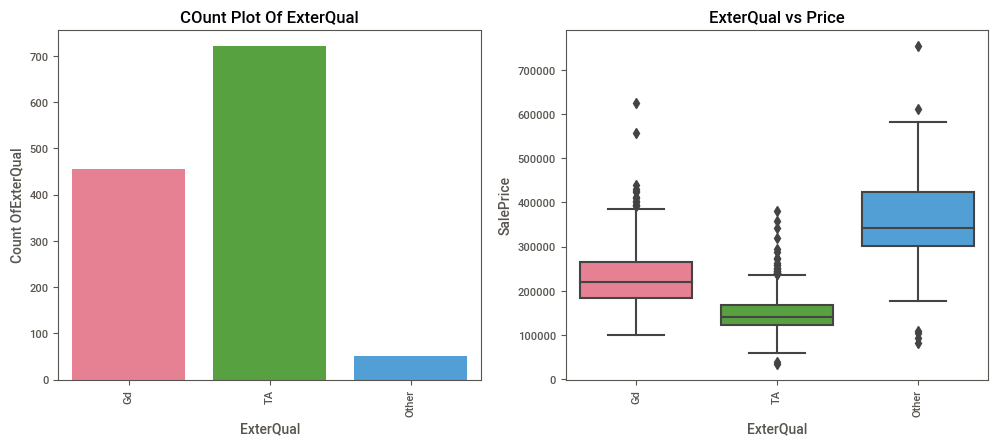

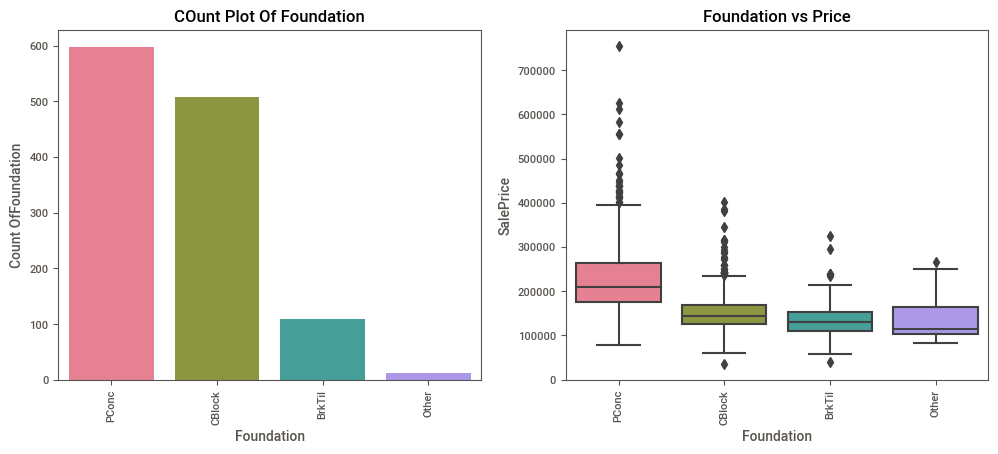

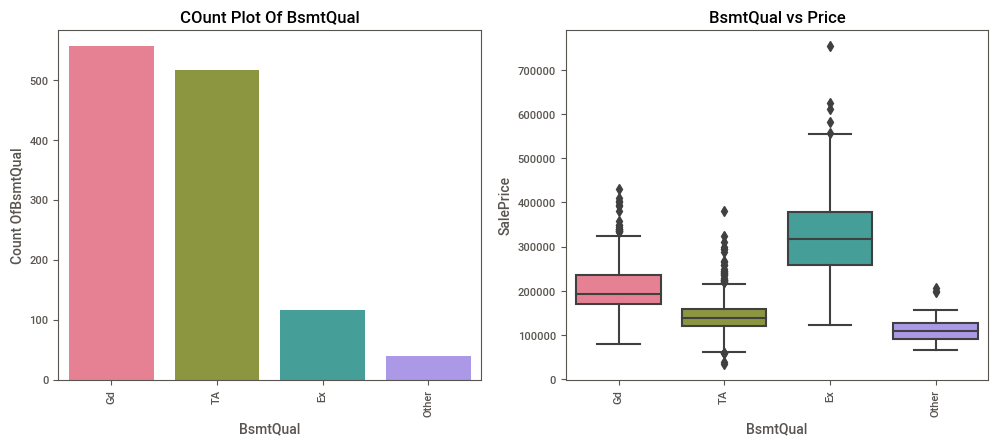

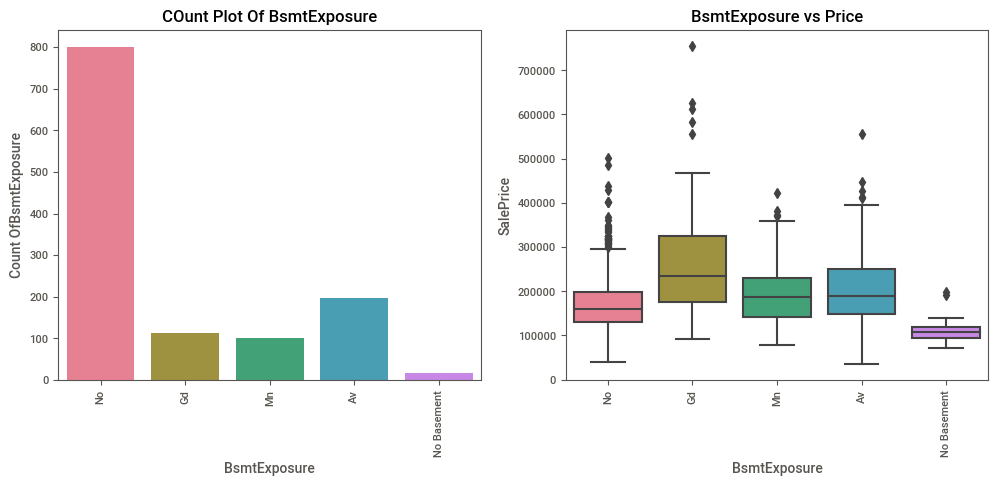

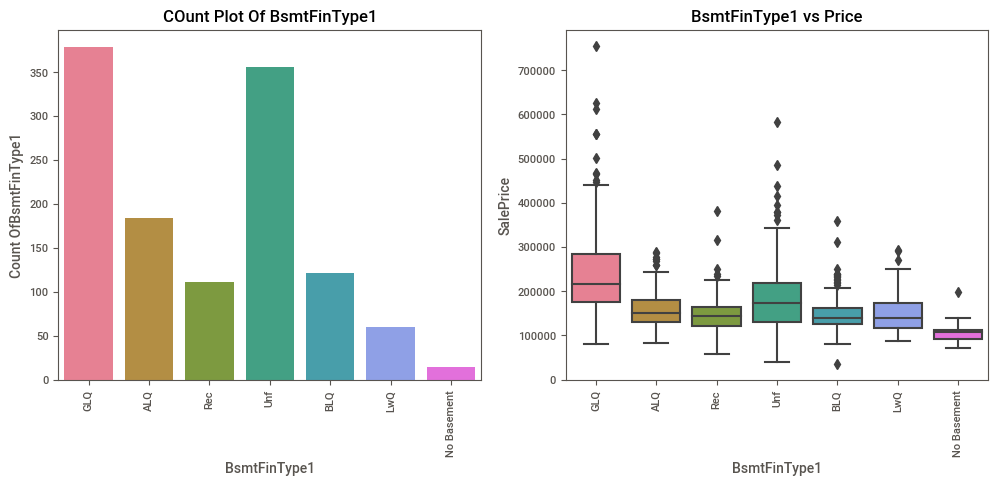

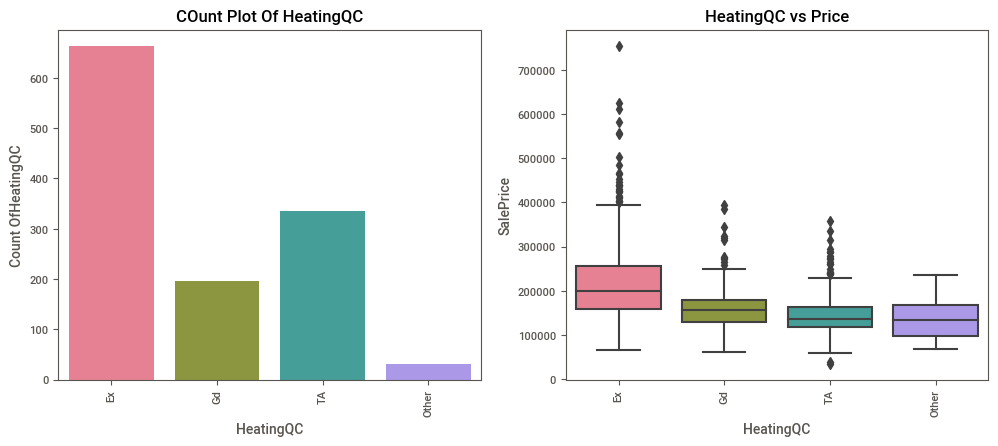

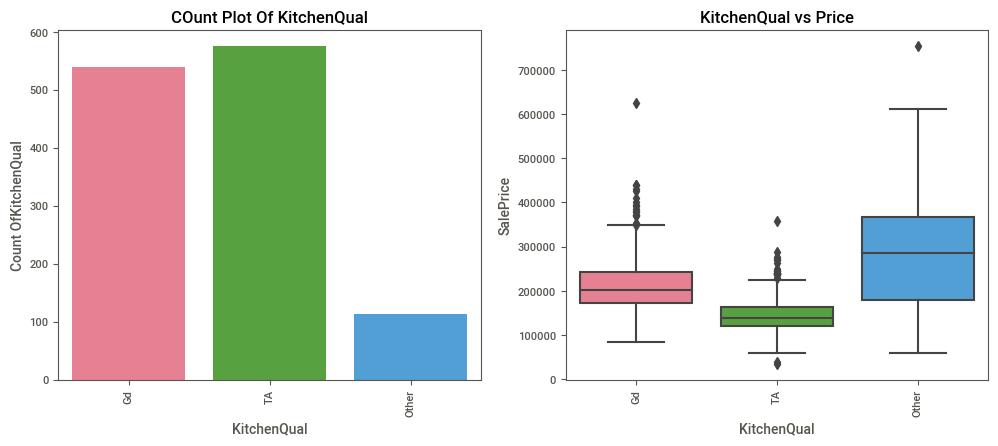

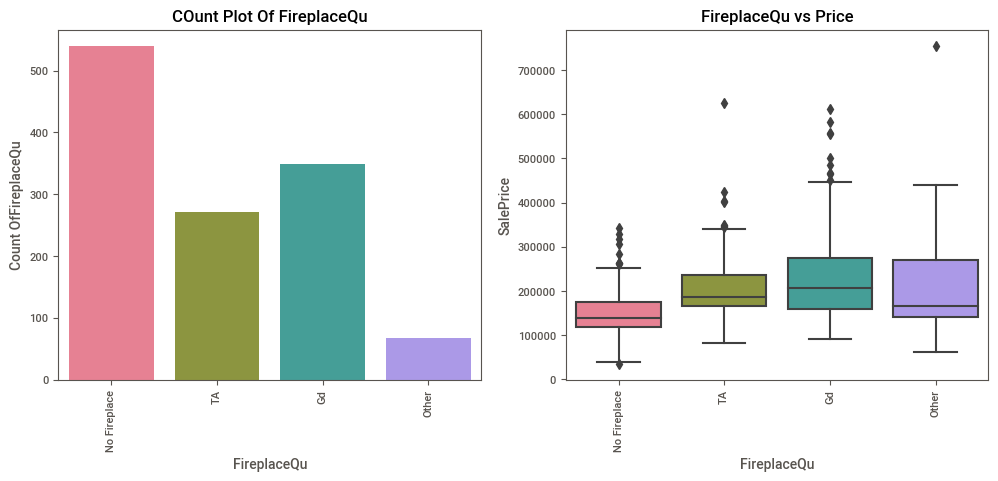

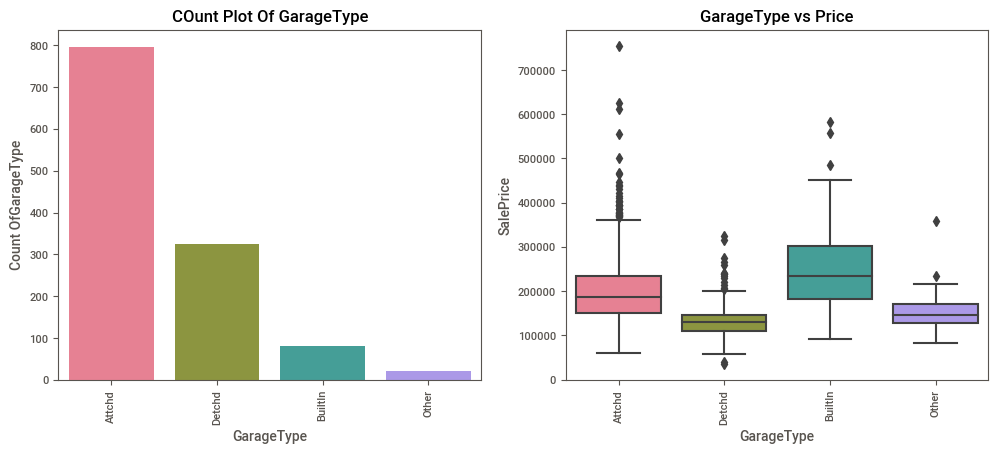

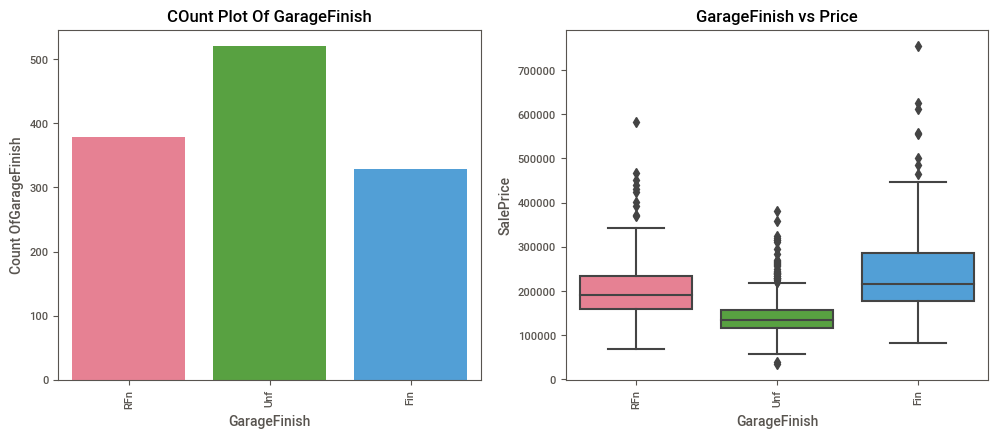

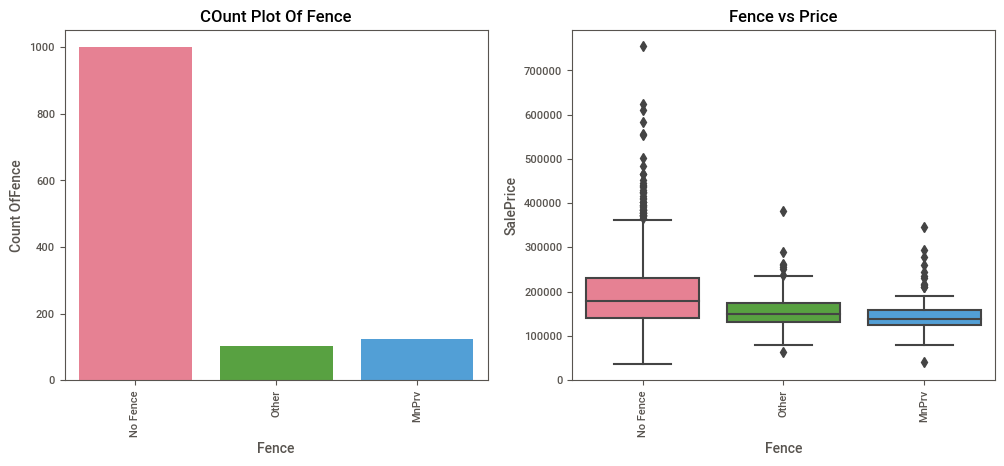

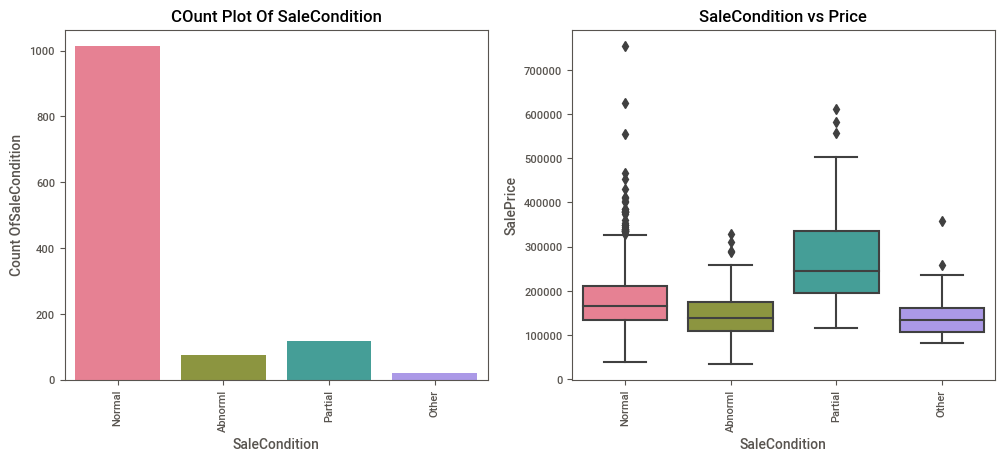

In [34]:
cat_col = house_dt.select_dtypes(include=['object']).columns
cat_col
for i in cat_col:
    plot_charts(i,label_rotation=True)

After converting some values to others for respective column, now we are getting some well balanced data, which is good.


### Categorical Dummies


In [35]:
cat_data = house_dt.select_dtypes(include=['object'])

In [36]:
# Convert into dummies
house_dummies = pd.get_dummies(cat_data,drop_first=True)
house_dummies.head()

,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Other,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Other,RoofStyle_Hip,RoofStyle_Other,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Other,ExterQual_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Gd,BsmtQual_Other,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Other,KitchenQual_TA,FireplaceQu_No Fireplace,FireplaceQu_Other,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,Fence_Other,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
3,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [37]:
#dropping original categorical columns
house_dt = house_dt.drop(list(cat_data.columns), axis=1)

In [38]:
house_dt= pd.concat([house_dt,house_dummies], axis=1)

In [39]:
house_dt.shape

(1227, 118)

In [40]:
#Dropping ID column
house_dt = house_dt.drop('Id', axis=1)

In [41]:
# Variables more than 0.70 correlations
cor = house_dt.corr().abs()
s = cor.unstack()
sortval= s.sort_values(kind="quicksort", ascending=False)
df_corr = pd.DataFrame(sortval)
print(df_corr[(df_corr[0] < 1) & (df_corr[0] > 0.7)])

                                                          0
Exterior2nd_VinylSd      Exterior1st_VinylSd       0.979439
Exterior1st_VinylSd      Exterior2nd_VinylSd       0.979439
Exterior2nd_MetalSd      Exterior1st_MetalSd       0.973677
Exterior1st_MetalSd      Exterior2nd_MetalSd       0.973677
BsmtFinType1_No Basement BsmtExposure_No Basement  0.967846
BsmtExposure_No Basement BsmtFinType1_No Basement  0.967846
FireplaceQu_No Fireplace Fireplaces                0.900008
Fireplaces               FireplaceQu_No Fireplace  0.900008
Exterior2nd_Wd Sdng      Exterior1st_Wd Sdng       0.869748
Exterior1st_Wd Sdng      Exterior2nd_Wd Sdng       0.869748
TotalBsmtSF              1stFlrSF                  0.863966
1stFlrSF                 TotalBsmtSF               0.863966
GarageCars               GarageArea                0.841957
GarageArea               GarageCars                0.841957
2ndFlrSF                 HouseStyle_2Story         0.831759
HouseStyle_2Story        2ndFlrSF       

In [42]:
#Removing one variable from the highly correlated variables pair
house_dt = house_dt.drop(['BsmtExposure_No Basement','Exterior2nd_VinylSd','Exterior1st_MetalSd','Fireplaces','GarageCars',
                           'Exterior1st_Wd Sdng','TotRmsAbvGrd','1stFlrSF','2ndFlrSF','Exterior1st_Other','Foundation_CBlock',
                           'BsmtQual_TA','HouseStyle_2Story','Exterior2nd_Plywood','Condition1_Other','GrLivArea','BsmtQual_Other'],axis=1)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

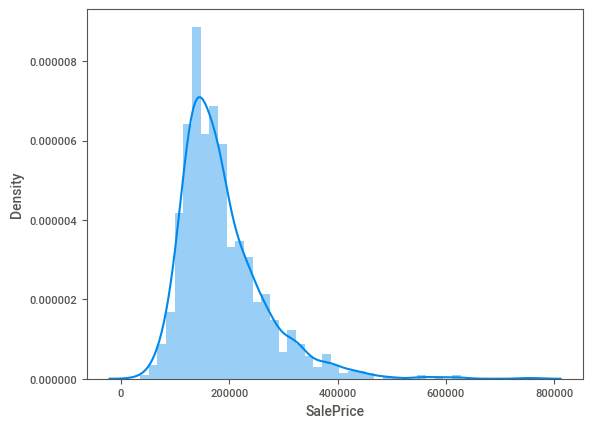

In [43]:
#Checking distribution of target columns SalePrice
sns.distplot(house_dt['SalePrice'])

The distribution plot of the SalePrice column is little right skewd.

In [73]:
#Auto EDA after Data Cleaning
import sweetviz as sv
sweet_report = sv.analyze(house_dt, pairwise_analysis='off')
sweet_report.show_html('Housing_sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Housing_sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Model Building


In [44]:
# Splitting data into train and test set

df_train, df_test = train_test_split(house_dt, train_size=0.7,test_size=0.3,random_state=100)

In [45]:
df_train.shape,df_test.shape

((858, 100), (369, 100))

#### Feature scaling

In [46]:
scaler = StandardScaler()

In [47]:
# We don't need to scale the binary variables as they are already scaled into 0 and 1. Scaling only the numeric cariables
# Numeric columns list

numeric_cols = list(df_train.select_dtypes(include=['int64','float64']).columns)
#Fit the data into scaler and transform
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Other,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,HouseStyle_1Story,HouseStyle_Other,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Other,RoofStyle_Hip,RoofStyle_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Other,ExterQual_TA,Foundation_Other,Foundation_PConc,BsmtQual_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Other,KitchenQual_TA,FireplaceQu_No Fireplace,FireplaceQu_Other,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,Fence_Other,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
1114,0.984558,-0.964872,-0.598285,-0.091452,-0.309063,-0.349835,-0.616221,0.0,-0.879136,-0.232727,-1.022828,-0.838430,-1.137712,0.0,-0.949827,-0.801678,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-0.904570,0.689231,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
295,-1.636741,-0.415729,-0.598285,0.841755,-0.309063,-0.871428,-0.195685,0.0,1.116364,-0.232727,-1.022828,-0.838430,0.250847,0.0,0.489231,0.181711,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-0.576503,-0.367965,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0
719,-0.054070,0.013500,-0.598285,0.158019,-0.309063,-0.282965,-0.274845,0.0,-0.879136,-0.232727,-1.022828,1.148789,0.250847,0.0,-1.092634,-0.801678,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-0.756618,0.160633,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0
273,0.489973,-0.055766,0.396980,0.382081,3.336053,-1.281570,0.390592,0.0,1.116364,-0.232727,0.790367,-0.838430,0.250847,0.0,-0.883916,1.566652,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-0.621532,0.653991,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
551,-0.993781,-0.835000,-0.598285,-0.338613,-0.309063,0.100428,-0.381216,0.0,-0.879136,-0.232727,-1.022828,-0.838430,0.250847,0.0,-1.158545,-0.801678,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-0.962464,0.653991,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0


In [48]:
#Popping out the Saleprice column for y_train
y_train = df_train.pop('SalePrice')
#Creating X_train
X_train = df_train

In [49]:
#Scale the test set variables with Standard scaler
# We dont fit scaler on the test set. We only transform the test set.
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeHouse,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Other,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,HouseStyle_1Story,HouseStyle_Other,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Other,RoofStyle_Hip,RoofStyle_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Other,ExterQual_TA,Foundation_Other,Foundation_PConc,BsmtQual_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Other,KitchenQual_TA,FireplaceQu_No Fireplace,FireplaceQu_Other,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,Fence_Other,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
632,0.737266,0.442078,0.538384,0.848685,-0.309063,-0.024397,0.751758,0.0,-0.879136,-0.232727,0.790367,-0.838430,0.250847,0.0,0.247557,0.771745,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,-1.348425,-0.015566,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
854,1.578060,1.745131,-0.598285,-0.343233,6.069891,-0.452371,1.684358,0.0,1.116364,-0.232727,-1.022828,1.148789,0.250847,0.0,-0.246776,-0.801678,5.828585,-0.35013,0.0,5.214598,0.0,0.0,-0.222705,0.653991,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
631,-1.785117,-1.140200,-0.010915,-0.994629,-0.309063,2.128845,1.167346,0.0,-0.879136,-0.232727,0.790367,-0.838430,-1.137712,0.0,0.703442,0.476728,0.407961,-0.35013,0.0,-0.305671,0.0,0.0,0.285477,-1.108002,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
751,-0.054070,-0.456205,-0.598285,-1.050067,-0.309063,0.189590,-1.044178,0.0,-0.879136,-0.232727,0.790367,1.148789,0.250847,0.0,-0.543376,-0.801678,0.015163,-0.35013,0.0,-0.305671,0.0,0.0,-0.325628,-1.002283,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
619,0.737266,0.516539,0.630840,0.961870,-0.309063,0.080367,0.989237,0.0,1.116364,-0.232727,0.790367,1.148789,1.639405,0.0,1.373537,0.575067,-0.739011,-0.35013,0.0,-0.305671,0.0,0.0,1.514120,-0.967043,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [50]:
#popping out the SalePrice column to create y_test
y_test = df_test.pop('SalePrice')
#Creating X_test
x_test = df_test

###### Lets try with Linear Regression

In [51]:
# Instantiate the linear regression
lm = LinearRegression()
# Fit the model with tarin set
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict the model with train set
y_train_pred = lm.predict(X_train)
# r2 score for the train model
print("R2 Score for train:",r2_score(y_true = y_train, y_pred=y_train_pred))

R2 Score for train: 0.8711296358252947


In [53]:
# Fit the model with test set
y_test_pred = lm.predict(x_test)
# r2 score for the test set
print("R2 Score for test:",r2_score(y_true = y_test, y_pred=y_test_pred))

R2 Score for test: 0.8555670596520879


In [54]:
mse_test_lr = mean_squared_error(y_train, y_train_pred)
print("MSE:",mse_test_lr)
print("RMSE:", mse_test_lr**0.5)

MSE: 0.12887036417470527
RMSE: 0.3589851865672249


In [55]:
#Model parameters coefficients
model_parameters = lm.coef_
# model coefficients
cols = X_train.columns
cols= cols.insert(0,"constant")
list(zip(cols, model_parameters))

[('constant', 0.02134703253578017),
 ('LotFrontage', 0.00200919543912359),
 ('LotArea', 0.10442376962564767),
 ('MasVnrArea', -113686077522.2178),
 ('BsmtFinSF1', -44666706641.856384),
 ('BsmtFinSF2', -117811578056.38008),
 ('BsmtUnfSF', 106157180496.29857),
 ('TotalBsmtSF', 31420597056.412254),
 ('LowQualFinSF', -0.002282251715513918),
 ('BsmtFullBath', 0.0083465576171875),
 ('BsmtHalfBath', 0.1455535888671875),
 ('FullBath', 0.0869140625),
 ('HalfBath', 0.04801177978515625),
 ('BedroomAbvGr', -31365781164.59572),
 ('KitchenAbvGr', 0.09169387817382812),
 ('GarageArea', 0.03375244140625),
 ('WoodDeckSF', -0.01911163330078125),
 ('OpenPorchSF', -0.00478363037109375),
 ('EnclosedPorch', -8144303332.254591),
 ('3SsnPorch', 0.01949310302734375),
 ('ScreenPorch', 1703640788.951109),
 ('PoolArea', -4565949230.3526),
 ('MiscVal', 0.0307464599609375),
 ('AgeHouse', -0.09518051147460938),
 ('MSSubClass_50', 0.09161567687988281),
 ('MSSubClass_60', -0.09472465515136719),
 ('MSSubClass_120', -0.0

### Ridge


In [56]:
#Specify the range of hyperparameters(aplha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

#Instantiate Ridge regression
ridge = Ridge()
folds = 5
model_gridcv = GridSearchCV(estimator=ridge,
                            param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
# Fitting the model with train set
model_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [57]:
print("Best estimator: ",model_gridcv.best_estimator_)

Best estimator:  Ridge(alpha=10.0)


In [58]:
print("Best Score:", model_gridcv.best_score_)

Best Score: 0.8166351581396227


In [59]:
y_pred_train = model_gridcv.predict(X_train)
y_pred_test = model_gridcv.predict(x_test)

In [60]:
print("R2 Score for train:",r2_score(y_train, y_pred_train))
print("R2 Score for test:", r2_score(y_test, y_pred_test))
mse_test_lr = mean_squared_error(y_train,y_pred_train)
print("MSE: ",mse_test_lr)
print("RMSE: ",mse_test_lr**0.5)

R2 Score for train: 0.865379187369073
R2 Score for test: 0.8604499426938114
MSE:  0.13462081263092696
RMSE:  0.3669070899164078


In [61]:
#creating dataframe with model_ridge results
ridge_cv_results = pd.DataFrame(model_gridcv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004309,0.003033,0.002023,0.000591,0.0001,{'alpha': 0.0001},0.803414,0.848646,0.886711,0.825865,0.683754,0.809678,0.068718,23,0.881040,0.870399,0.862916,0.875302,0.895442,0.877020,0.010966
1,0.003536,0.001576,0.002067,0.001307,0.001,{'alpha': 0.001},0.803418,0.848647,0.886714,0.825866,0.683763,0.809681,0.068715,22,0.881040,0.870399,0.862916,0.875302,0.895442,0.877020,0.010966
2,0.003594,0.001497,0.001469,0.000392,0.01,{'alpha': 0.01},0.803462,0.848656,0.886745,0.825873,0.683847,0.809717,0.068692,21,0.881040,0.870399,0.862915,0.875302,0.895442,0.877020,0.010966
3,0.003223,0.000456,0.001673,0.000585,0.05,{'alpha': 0.05},0.803653,0.848699,0.886876,0.825903,0.684209,0.809868,0.068591,20,0.881037,0.870397,0.862913,0.875300,0.895439,0.877017,0.010966
4,0.003382,0.001897,0.002551,0.002715,0.1,{'alpha': 0.1},0.803882,0.848748,0.887029,0.825934,0.684642,0.810047,0.068470,19,0.881029,0.870391,0.862905,0.875293,0.895429,0.877009,0.010965


In [62]:
# Instantiate Ridge regression with alphs = 10.0
model_ridge = Ridge(alpha=10.0)
#Fitting the model with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=10.0)

In [63]:
y_pred_train = model_ridge.predict(X_train)
y_pred_test = model_ridge.predict(x_test)

In [64]:
print("R2 Score for train: ",r2_score(y_train,y_pred_train))
print("R2 Score for test:", r2_score(y_test, y_pred_test))
mse_test_lr= mean_squared_error(y_train,y_pred_train)
print("MSE: ",mse_test_lr)
print("RMSE: ",mse_test_lr**0.5)

R2 Score for train:  0.865379187369073
R2 Score for test: 0.8604499426938114
MSE:  0.13462081263092696
RMSE:  0.3669070899164078


In [65]:
# Ridge regression model parameters

#Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
#Inserting Y Intercept to model parameters list

model_ridge_parameters.insert(0, model_ridge.intercept_)
#Roundung off the coefficents
model_ridge_parameters=[round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols= cols.insert(0,'constant')
ridge_param_list = list(zip(cols,model_ridge_parameters))
ridge_param_list

[('constant', -0.082),
 ('LotFrontage', 0.029),
 ('LotArea', 0.009),
 ('MasVnrArea', 0.11),
 ('BsmtFinSF1', 0.141),
 ('BsmtFinSF2', 0.037),
 ('BsmtUnfSF', 0.038),
 ('TotalBsmtSF', 0.209),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', -0.003),
 ('BsmtHalfBath', 0.006),
 ('FullBath', 0.155),
 ('HalfBath', 0.093),
 ('BedroomAbvGr', 0.054),
 ('KitchenAbvGr', 0.0),
 ('GarageArea', 0.102),
 ('WoodDeckSF', 0.035),
 ('OpenPorchSF', -0.012),
 ('EnclosedPorch', -0.005),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.024),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('AgeHouse', 0.024),
 ('MSSubClass_50', -0.035),
 ('MSSubClass_60', 0.093),
 ('MSSubClass_120', -0.056),
 ('MSSubClass_Other', -0.064),
 ('MSZoning_RL', 0.06),
 ('MSZoning_RM', -0.013),
 ('LotShape_Other', 0.057),
 ('LotShape_Reg', -0.03),
 ('LotConfig_Inside', -0.036),
 ('LotConfig_Other', 0.007),
 ('Neighborhood_CollgCr', -0.12),
 ('Neighborhood_Crawfor', 0.296),
 ('Neighborhood_Edwards', -0.192),
 ('Neighborhood_Gilbert', -0.142),
 ('Neighborhood

In [66]:
ridge_params_data = pd.DataFrame({'Parameter':cols, 'Coef':model_ridge_parameters})
(ridge_params_data.sort_values('Coef', ascending=False)).head(10)

,Parameter,Coef
53,OverallQual_Other,0.501
35,Neighborhood_Crawfor,0.296
52,OverallQual_8,0.273
85,KitchenQual_Other,0.242
7,TotalBsmtSF,0.209
99,SaleCondition_Partial,0.203
68,ExterQual_Other,0.161
79,BsmtFinType1_No Basement,0.157
11,FullBath,0.155
66,MasVnrType_None,0.154


### Lasso

In [70]:
params = {'alpha':[0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}
lasso = Lasso()
model_gridcv = GridSearchCV(estimator = lasso, 
                            param_grid=params,
                            scoring = 'r2',
                            cv=folds,
                            return_train_score=True,
                            verbose=1)
#Fitting the model with train set
model_gridcv.fit(X_train, y_train)


Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
#creating dataframe with model_cv results
lasso_cv_results = pd.DataFrame(model_gridcv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021853,0.012806,0.001427,0.000101,0.0001,{'alpha': 0.0001},0.803955,0.849470,0.887750,0.826966,0.685714,0.810771,0.068369,2,0.880958,0.870330,0.862842,0.875249,0.895371,0.876950,0.010965
1,0.007317,0.000640,0.001182,0.000121,0.001,{'alpha': 0.001},0.806138,0.855547,0.892173,0.830714,0.695519,0.816018,0.066627,1,0.878222,0.868198,0.860117,0.872400,0.892381,0.874264,0.010810
2,0.002782,0.000074,0.001283,0.000101,0.01,{'alpha': 0.01},0.796446,0.852026,0.891212,0.807882,0.693464,0.808206,0.066505,3,0.848750,0.837868,0.830496,0.841511,0.864551,0.844635,0.011567
3,0.002396,0.000145,0.001283,0.000100,0.05,{'alpha': 0.05},0.726331,0.783012,0.806247,0.670791,0.622907,0.721858,0.068236,4,0.741026,0.741522,0.728533,0.751596,0.770520,0.746640,0.014003
4,0.002047,0.000086,0.001117,0.000120,0.1,{'alpha': 0.1},0.663428,0.739217,0.747633,0.626849,0.604083,0.676242,0.058092,5,0.678889,0.690221,0.678265,0.712020,0.725820,0.697043,0.018874


In [79]:
y_pred_train = model_gridcv.predict(X_train)
y_pred_test = model_gridcv.predict(x_test)

In [80]:
print("R2 Score for train: ",r2_score(y_train, y_pred_train))
print("R2 Score for test: ",r2_score(y_test, y_pred_test))
mse_test_lr = mean_squared_error(y_train, y_pred_train)
print("MSE:",mse_test_lr)
print("RMSE: ",mse_test_lr**0.5)

R2 Score for train:  0.8684700388769582
R2 Score for test:  0.8581245331832774
MSE: 0.1315299611230418
RMSE:  0.3626705958897713


In [81]:
model_gridcv.best_score_

0.8160178737488906

In [82]:
model_gridcv.best_estimator_

Lasso(alpha=0.001)

In [83]:
#Instantiate Lasso regression with alpha=0.02
model_lasso = Lasso(0.001)
#Fitting the model with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [84]:
y_pred_train = model_lasso.predict(X_train)
y_pred_test = model_lasso.predict(x_test)

In [85]:
print("R2 Score for train: ",r2_score(y_train, y_pred_train))
print("R2 Score for test:",r2_score(y_test, y_pred_test))
mse_test_lr = mean_squared_error(y_train, y_pred_train)
print("MSE:",mse_test_lr)
print("RMSE:",mse_test_lr**0.5)

R2 Score for train:  0.8684700388769582
R2 Score for test: 0.8581245331832774
MSE: 0.1315299611230418
RMSE: 0.3626705958897713


In [86]:
#Co-efficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model paramters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols= cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', -0.325),
 ('LotFrontage', 0.026),
 ('LotArea', 0.009),
 ('MasVnrArea', 0.103),
 ('BsmtFinSF1', 0.106),
 ('BsmtFinSF2', 0.022),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.242),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', -0.0),
 ('BsmtHalfBath', 0.007),
 ('FullBath', 0.146),
 ('HalfBath', 0.086),
 ('BedroomAbvGr', 0.053),
 ('KitchenAbvGr', 0.0),
 ('GarageArea', 0.097),
 ('WoodDeckSF', 0.036),
 ('OpenPorchSF', -0.014),
 ('EnclosedPorch', -0.002),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.024),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('AgeHouse', 0.013),
 ('MSSubClass_50', -0.0),
 ('MSSubClass_60', 0.119),
 ('MSSubClass_120', -0.057),
 ('MSSubClass_Other', -0.04),
 ('MSZoning_RL', 0.059),
 ('MSZoning_RM', -0.0),
 ('LotShape_Other', 0.065),
 ('LotShape_Reg', -0.021),
 ('LotConfig_Inside', -0.032),
 ('LotConfig_Other', 0.005),
 ('Neighborhood_CollgCr', -0.112),
 ('Neighborhood_Crawfor', 0.394),
 ('Neighborhood_Edwards', -0.182),
 ('Neighborhood_Gilbert', -0.134),
 ('Neighborhood_NAm

In [87]:
#Parameters having better coefficients
lasso_params_data = pd.DataFrame({'Parameter':cols,'Coef':model_lasso_parameters})
lasso_params_data = lasso_params_data.loc[lasso_params_data['Coef']!=0]
lasso_params_data.sort_values('Coef',ascending=False).head(10)

,Parameter,Coef
53,OverallQual_Other,0.917
52,OverallQual_8,0.485
35,Neighborhood_Crawfor,0.394
79,BsmtFinType1_No Basement,0.316
99,SaleCondition_Partial,0.263
7,TotalBsmtSF,0.242
85,KitchenQual_Other,0.220
55,OverallCond_7,0.168
51,OverallQual_7,0.158
46,Condition1_Norm,0.153


### Observe the change in the coefficiants

In [89]:
coeff= pd.DataFrame(index=X_train.columns)
coeff.rows = X_train.columns
coeff['Linear'] = lm.coef_
coeff['Ridge'] = model_ridge.coef_
coeff['Lasso'] = model_lasso.coef_


pd.set_option('display.max_rows', None)
coeff.head(68)


,Linear,Ridge,Lasso
LotFrontage,2.134703e-02,0.028517,0.025685
LotArea,2.009195e-03,0.009413,0.009002
MasVnrArea,1.044238e-01,0.109795,0.102835
BsmtFinSF1,-1.136861e+11,0.141230,0.105813
BsmtFinSF2,-4.466671e+10,0.036787,0.021668
BsmtUnfSF,-1.178116e+11,0.038455,-0.000000
TotalBsmtSF,1.061572e+11,0.209402,0.241871
LowQualFinSF,3.142060e+10,0.000000,0.000000
BsmtFullBath,-2.282252e-03,-0.002629,-0.000000
BsmtHalfBath,8.346558e-03,0.005617,0.006815
